Primary Endpoint Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/dr.shivambhatnagar/Desktop/github_python/Diabetes_Dataset_Cleaned.csv')
df.select_dtypes(include=['float64', 'int64']).columns.tolist()

['TreatmentGroup',
 'StudySite',
 'Age',
 'Gender',
 'BMI',
 'DiabetesDuration',
 'SmokingStatus',
 'EducationLevel',
 'Complications',
 'BaselineHbA1c',
 'BaselineFBS',
 'BaselineWeight',
 'BaselineQoL',
 'FollowupCompleted',
 'HbA1cChange',
 'FollowupHbA1c',
 'FBSChange',
 'FollowupFBS',
 'WeightChange',
 'FollowupWeight',
 'QoLChange',
 'FollowupQoL',
 'TargetAchieved',
 'PatientSatisfaction',
 'AdverseEvents',
 'DaysToComplication',
 'ComplicationOccurred',
 'MedicationAdherence']

In [9]:
df.sample(5)

,ParticipantID,TreatmentGroup,RandomizationDate,StudySite,Age,Gender,BMI,DiabetesDuration,SmokingStatus,EducationLevel,...,WeightChange,FollowupWeight,QoLChange,FollowupQoL,TargetAchieved,PatientSatisfaction,AdverseEvents,DaysToComplication,ComplicationOccurred,MedicationAdherence
282,DM1283,1,2024-06-30,3,27,0,23.4,15,0,1,...,-6.0,66.2,8.5,64.0,0,2,0,349,1,81.6
189,DM1190,1,2024-02-13,0,50,1,34.6,18,0,0,...,-2.9,89.9,-1.0,61.0,1,1,0,17,1,64.6
16,DM1017,0,2024-04-27,1,60,0,30.9,2,1,1,...,0.1,61.3,7.3,65.3,0,1,0,123,1,94.7
274,DM1275,1,2024-04-13,2,72,0,31.8,12,0,2,...,-4.6,68.7,20.0,69.0,0,2,2,55,1,92.4
228,DM1229,1,2024-04-24,2,49,0,31.0,13,0,0,...,-5.5,75.2,7.6,87.0,0,3,1,240,1,92.2


In [ ]:
#Control group
group_A = df[df['TreatmentGroup']== 0]['BaselineHbA1c']
group_B = df[df['TreatmentGroup']== 0]['FollowupHbA1c']
#New Intervention group
group_C = df[df['TreatmentGroup']== 1]['BaselineHbA1c']
group_D = df[df['TreatmentGroup']== 1]['FollowupHbA1c']

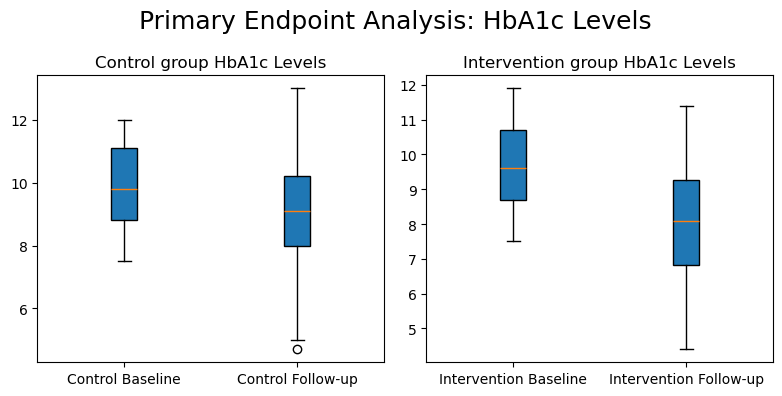

In [26]:
fig, axes = plt.subplots(1,2, figsize = (8,4))
fig.suptitle('Primary Endpoint Analysis: HbA1c Levels', fontsize = 18)
axes[0].boxplot([group_A, group_B], tick_labels=['Control Baseline', 'Control Follow-up'],patch_artist=True)
axes[0].set_title('Control group HbA1c Levels')
axes[1].boxplot([group_C, group_D], tick_labels=['Intervention Baseline', 'Intervention Follow-up'], patch_artist=True)
axes[1].set_title('Intervention group HbA1c Levels')
plt.tight_layout()
plt.show()

In [31]:
from scipy import stats 
t_stat, p_value = stats.ttest_rel(group_C, group_D)
print(f'{t_stat:.2f}, {p_value:.2f}')

22.55, 0.00


In [34]:
t_stat_control, p_value_control = stats.ttest_rel(group_A, group_B)
print(f'{t_stat_control:.2f}, {p_value_control:.2f}')

11.02, 0.00


In [32]:
t_stat_ind, p_value_ind = stats.ttest_ind(group_A, group_C)
print(f'{t_stat_ind:.2f}, {p_value_ind:.2f}')

1.38, 0.17


In [33]:
t_stat_foll, p_value_foll = stats.ttest_ind(group_B, group_D)
print(f'{t_stat_foll:.2f}, {p_value_foll:.2f}')

5.11, 0.00
